In [1]:
%cd ~/projects/myanmar-digits/

/home/edward/projects/myanmar-digits


In [2]:
%pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 6.1 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 5.6 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.7/87.7 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 960.8/960.8 kB 6.4 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.9/295.9 kB 6.5 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 6.5 MB/s eta 0:00:00 MB/s eta 0:00:01:01
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115926 sha256=896954af2934770ed651bd0d7a58377c8f4a7732fd18041d7e7b620d0140e4ec
  Stored in directory: /home/edward/.cache/pip/wheels/1f/10/06/2a990ee4d73a8479fe2922445e8a876d38cfbfed052284c6a1
Successfully built fire
Note: you may n

In [3]:
import numpy as np
from datetime import datetime 

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

from torchvision import datasets, transforms

import matplotlib.pyplot as plt

# check device
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

from myanmar_digits import load_data

/home/edward/anaconda3/envs/py38/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
N_CLASSES = 10
X, y = load_data(as_frame=False, return_X_y=True, num_classes = N_CLASSES)
X.shape, y.shape

((4498, 2304), (4498,))

In [5]:
X = X.reshape (-1, 48, 48)
X = 255 - X

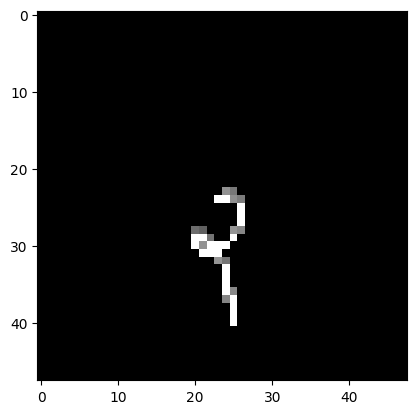

In [6]:
plt.imshow (X[1000], cmap= "gray")
plt.show()

In [7]:
X = X.reshape (-1, 48 * 48)

In [8]:
from sklearn import feature_selection as fs, model_selection as ms
from sklearn import linear_model
from sklearn import metrics
tr_X, ts_X, tr_y, ts_y = ms.train_test_split(X, y, random_state = 42)

model = linear_model.LogisticRegression(
    penalty= "elasticnet",  
    C= 0.0001, 
    random_state=42,
    solver="saga", 
    max_iter= 2000, 
    multi_class="ovr",
    l1_ratio= 0.15,
    verbose=1,
    n_jobs=4
)
model.fit(tr_X, tr_y)
y_pred = model.predict (ts_X)
print(metrics.classification_report(ts_y, y_pred))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


Epoch 1, change: 1.00000000
Epoch 1, change: 1.00000000
Epoch 1, change: 1.00000000
Epoch 1, change: 1.00000000
Epoch 2, change: 0.16408165
Epoch 2, change: 0.14982791
Epoch 2, change: 0.14543164
Epoch 2, change: 0.18019267
Epoch 3, change: 0.10695680
Epoch 3, change: 0.13644610
Epoch 3, change: 0.09343673
Epoch 3, change: 0.09324331
Epoch 4, change: 0.07035919
Epoch 4, change: 0.09128390
Epoch 4, change: 0.06779305
Epoch 4, change: 0.06312756
Epoch 5, change: 0.07337078
Epoch 5, change: 0.05723838
Epoch 5, change: 0.06222578
Epoch 5, change: 0.04698875
Epoch 6, change: 0.04819243
Epoch 6, change: 0.06092387
Epoch 6, change: 0.05372431
Epoch 6, change: 0.04310492
Epoch 7, change: 0.03978999
Epoch 7, change: 0.05102828
Epoch 7, change: 0.04398418
Epoch 7, change: 0.03525756
Epoch 8, change: 0.03413851
Epoch 8, change: 0.04577529
Epoch 8, change: 0.03823998
Epoch 8, change: 0.03365681
Epoch 9, change: 0.02999615
Epoch 9, change: 0.03353337
Epoch 9, change: 0.03832920
Epoch 9, change: 0.0

Epoch 110, change: 0.00183850
Epoch 109, change: 0.00235691
Epoch 106, change: 0.00181712
Epoch 111, change: 0.00179956
Epoch 103, change: 0.00492239
Epoch 110, change: 0.00234565
Epoch 107, change: 0.00180747
Epoch 112, change: 0.00176713
Epoch 104, change: 0.00486679
Epoch 108, change: 0.00180025
Epoch 111, change: 0.00233027
Epoch 113, change: 0.00173386
Epoch 105, change: 0.00481773
Epoch 112, change: 0.00231700
Epoch 109, change: 0.00176846
Epoch 114, change: 0.00170729
Epoch 106, change: 0.00476681
Epoch 113, change: 0.00229978
Epoch 110, change: 0.00175379
Epoch 115, change: 0.00167555
Epoch 107, change: 0.00471764
Epoch 114, change: 0.00229022
Epoch 111, change: 0.00171580
Epoch 116, change: 0.00163858
Epoch 108, change: 0.00467323
Epoch 115, change: 0.00228034
Epoch 112, change: 0.00170270
Epoch 117, change: 0.00160592
Epoch 109, change: 0.00462510
Epoch 116, change: 0.00226322
Epoch 113, change: 0.00168166
Epoch 118, change: 0.00157736
Epoch 117, change: 0.00225107
Epoch 110,

Epoch 200, change: 0.00224546
Epoch 212, change: 0.00135778
Epoch 218, change: 0.00083254
Epoch 207, change: 0.00086539
Epoch 201, change: 0.00223139
Epoch 219, change: 0.00082857
Epoch 213, change: 0.00134735
Epoch 208, change: 0.00086173
Epoch 202, change: 0.00222027
Epoch 220, change: 0.00082529
Epoch 214, change: 0.00134032
Epoch 209, change: 0.00085646
Epoch 221, change: 0.00082058
Epoch 203, change: 0.00220780
Epoch 215, change: 0.00132922
Epoch 210, change: 0.00085220
Epoch 222, change: 0.00081830
Epoch 204, change: 0.00219520
Epoch 216, change: 0.00131996
Epoch 211, change: 0.00084842
Epoch 223, change: 0.00081369
Epoch 205, change: 0.00218426
Epoch 217, change: 0.00131247
Epoch 212, change: 0.00084502
Epoch 224, change: 0.00080898
Epoch 218, change: 0.00130298
Epoch 206, change: 0.00217238
Epoch 213, change: 0.00083930
Epoch 225, change: 0.00080575
Epoch 219, change: 0.00129775
Epoch 207, change: 0.00216118
Epoch 214, change: 0.00083529
Epoch 226, change: 0.00080272
Epoch 220,

Epoch 266, change: 0.00162780
Epoch 290, change: 0.00059718
Epoch 273, change: 0.00065545
Epoch 281, change: 0.00085103
Epoch 267, change: 0.00161872
Epoch 291, change: 0.00059486
Epoch 274, change: 0.00065324
Epoch 282, change: 0.00084164
Epoch 268, change: 0.00161322
Epoch 292, change: 0.00059336
Epoch 275, change: 0.00065089
Epoch 283, change: 0.00083913
Epoch 269, change: 0.00160585
Epoch 293, change: 0.00059154
Epoch 276, change: 0.00064853
Epoch 284, change: 0.00083441
Epoch 270, change: 0.00159926
Epoch 294, change: 0.00059044
Epoch 277, change: 0.00064664
Epoch 285, change: 0.00082953
Epoch 295, change: 0.00058870
Epoch 271, change: 0.00159283
Epoch 278, change: 0.00064454
Epoch 286, change: 0.00082305
Epoch 296, change: 0.00058611
Epoch 272, change: 0.00158678
Epoch 279, change: 0.00064224
Epoch 287, change: 0.00081492
Epoch 297, change: 0.00058459
Epoch 273, change: 0.00157981
Epoch 288, change: 0.00081012
Epoch 280, change: 0.00063970
Epoch 298, change: 0.00058307
Epoch 274,

Epoch 361, change: 0.00047305
Epoch 339, change: 0.00053517
Epoch 333, change: 0.00119364
Epoch 350, change: 0.00053331
Epoch 362, change: 0.00047075
Epoch 340, change: 0.00053382
Epoch 334, change: 0.00118568
Epoch 363, change: 0.00046861
Epoch 351, change: 0.00052987
Epoch 341, change: 0.00053188
Epoch 335, change: 0.00118077
Epoch 364, change: 0.00046773
Epoch 352, change: 0.00052647
Epoch 342, change: 0.00053084
Epoch 336, change: 0.00117151
Epoch 365, change: 0.00046587
Epoch 353, change: 0.00052204
Epoch 343, change: 0.00052973
Epoch 337, change: 0.00116463
Epoch 366, change: 0.00046421
Epoch 354, change: 0.00051917
Epoch 344, change: 0.00052834
Epoch 338, change: 0.00115834
Epoch 367, change: 0.00046313
Epoch 355, change: 0.00051653
Epoch 345, change: 0.00052729
Epoch 339, change: 0.00115275
Epoch 368, change: 0.00046084
Epoch 356, change: 0.00051230
Epoch 346, change: 0.00052528
Epoch 340, change: 0.00114399
Epoch 369, change: 0.00045962
Epoch 357, change: 0.00051053
Epoch 347,

Epoch 432, change: 0.00034329
Epoch 418, change: 0.00033376
Epoch 406, change: 0.00045557
Epoch 400, change: 0.00083490
Epoch 433, change: 0.00034222
Epoch 419, change: 0.00033055
Epoch 407, change: 0.00045477
Epoch 401, change: 0.00083132
Epoch 434, change: 0.00034093
Epoch 420, change: 0.00032884
Epoch 408, change: 0.00045347
Epoch 402, change: 0.00082774
Epoch 435, change: 0.00033904
Epoch 421, change: 0.00032709
Epoch 409, change: 0.00045249
Epoch 403, change: 0.00082282
Epoch 436, change: 0.00033833
Epoch 422, change: 0.00032362
Epoch 410, change: 0.00045143
Epoch 437, change: 0.00033738
Epoch 404, change: 0.00081955
Epoch 423, change: 0.00032195
Epoch 411, change: 0.00045033
Epoch 438, change: 0.00033557
Epoch 405, change: 0.00081540
Epoch 424, change: 0.00031959
Epoch 412, change: 0.00044962
Epoch 439, change: 0.00033479
Epoch 406, change: 0.00081178
Epoch 425, change: 0.00031820
Epoch 413, change: 0.00044870
Epoch 440, change: 0.00033373
Epoch 407, change: 0.00080753
Epoch 426,

Epoch 466, change: 0.00062029
Epoch 487, change: 0.00023619
Epoch 503, change: 0.00026445
Epoch 473, change: 0.00039828
Epoch 488, change: 0.00023497
Epoch 467, change: 0.00061804
Epoch 504, change: 0.00026363
Epoch 474, change: 0.00039712
Epoch 489, change: 0.00023402
Epoch 505, change: 0.00026282
Epoch 468, change: 0.00061580
Epoch 475, change: 0.00039602
Epoch 490, change: 0.00023321
Epoch 506, change: 0.00026193
Epoch 469, change: 0.00061292
Epoch 476, change: 0.00039495
Epoch 491, change: 0.00023210
Epoch 507, change: 0.00026120
Epoch 470, change: 0.00061051
Epoch 477, change: 0.00039429
Epoch 492, change: 0.00023117
Epoch 508, change: 0.00026041
Epoch 471, change: 0.00060783
Epoch 478, change: 0.00039288
Epoch 509, change: 0.00025984
Epoch 493, change: 0.00023000
Epoch 472, change: 0.00060564
Epoch 479, change: 0.00039218
Epoch 510, change: 0.00025880
Epoch 494, change: 0.00022934
Epoch 473, change: 0.00060295
Epoch 480, change: 0.00039121
Epoch 511, change: 0.00025831
Epoch 495,

Epoch 556, change: 0.00019167
Epoch 532, change: 0.00047873
Epoch 540, change: 0.00034963
Epoch 574, change: 0.00021160
Epoch 557, change: 0.00019128
Epoch 533, change: 0.00047726
Epoch 541, change: 0.00034916
Epoch 575, change: 0.00021081
Epoch 558, change: 0.00019082
Epoch 534, change: 0.00047548
Epoch 542, change: 0.00034845
Epoch 576, change: 0.00021024
Epoch 559, change: 0.00019042
Epoch 535, change: 0.00047385
Epoch 543, change: 0.00034803
Epoch 577, change: 0.00020960
Epoch 560, change: 0.00018990
Epoch 536, change: 0.00047208
Epoch 578, change: 0.00020912
Epoch 544, change: 0.00034781
Epoch 561, change: 0.00018952
Epoch 537, change: 0.00047024
Epoch 579, change: 0.00020847
Epoch 545, change: 0.00034701
Epoch 562, change: 0.00018885
Epoch 580, change: 0.00020769
Epoch 538, change: 0.00046848
Epoch 546, change: 0.00034626
Epoch 563, change: 0.00018878
Epoch 581, change: 0.00020713
Epoch 539, change: 0.00046640
Epoch 547, change: 0.00034561
Epoch 564, change: 0.00018833
Epoch 582,

Epoch 607, change: 0.00031475
Epoch 598, change: 0.00037984
Epoch 626, change: 0.00016444
Epoch 645, change: 0.00017810
Epoch 608, change: 0.00031416
Epoch 599, change: 0.00037841
Epoch 646, change: 0.00017794
Epoch 627, change: 0.00016422
Epoch 609, change: 0.00031378
Epoch 600, change: 0.00037725
Epoch 647, change: 0.00017791
Epoch 628, change: 0.00016382
Epoch 610, change: 0.00031327
Epoch 601, change: 0.00037603
Epoch 648, change: 0.00017782
Epoch 629, change: 0.00016350
Epoch 611, change: 0.00031285
Epoch 602, change: 0.00037438
Epoch 649, change: 0.00017771
Epoch 630, change: 0.00016314
Epoch 612, change: 0.00031254
Epoch 650, change: 0.00017758
Epoch 603, change: 0.00037330
Epoch 631, change: 0.00016269
Epoch 613, change: 0.00031167
Epoch 651, change: 0.00017762
Epoch 604, change: 0.00037219
Epoch 632, change: 0.00016226
Epoch 614, change: 0.00031147
Epoch 652, change: 0.00017751
Epoch 633, change: 0.00016202
Epoch 605, change: 0.00037075
Epoch 615, change: 0.00031087
Epoch 653,

Epoch 750, change: 0.00015871
Epoch 696, change: 0.00027525
Epoch 730, change: 0.00013087
Epoch 751, change: 0.00015857
Epoch 709, change: 0.00027005
Epoch 697, change: 0.00027448
Epoch 731, change: 0.00013046
Epoch 710, change: 0.00026970
Epoch 752, change: 0.00015850
Epoch 698, change: 0.00027375
Epoch 732, change: 0.00013004
Epoch 753, change: 0.00015839
Epoch 711, change: 0.00026948
Epoch 699, change: 0.00027266
Epoch 733, change: 0.00012978
Epoch 754, change: 0.00015828
Epoch 712, change: 0.00026880
Epoch 700, change: 0.00027198
Epoch 734, change: 0.00012933
Epoch 755, change: 0.00015822
Epoch 713, change: 0.00026850
Epoch 701, change: 0.00027116
Epoch 756, change: 0.00015812
Epoch 735, change: 0.00012909
Epoch 714, change: 0.00026823
Epoch 702, change: 0.00027015
Epoch 757, change: 0.00015790
Epoch 736, change: 0.00012879
Epoch 715, change: 0.00026796
Epoch 758, change: 0.00015791
Epoch 703, change: 0.00026926
Epoch 737, change: 0.00012847
Epoch 716, change: 0.00026768
Epoch 759,

Epoch 776, change: 0.00024762
Epoch 821, change: 0.00015250
Epoch 798, change: 0.00011195
Epoch 763, change: 0.00022364
Epoch 822, change: 0.00015243
Epoch 777, change: 0.00024749
Epoch 799, change: 0.00011177
Epoch 764, change: 0.00022285
Epoch 823, change: 0.00015238
Epoch 778, change: 0.00024725
Epoch 765, change: 0.00022215
Epoch 800, change: 0.00011150
Epoch 824, change: 0.00015232
Epoch 779, change: 0.00024705
Epoch 766, change: 0.00022132
Epoch 825, change: 0.00015219
Epoch 801, change: 0.00011122
Epoch 780, change: 0.00024679
Epoch 767, change: 0.00022083
Epoch 826, change: 0.00015217
Epoch 802, change: 0.00011107
Epoch 781, change: 0.00024602
Epoch 768, change: 0.00022004
Epoch 827, change: 0.00015212
Epoch 803, change: 0.00011082
Epoch 782, change: 0.00024600
Epoch 828, change: 0.00015202
Epoch 769, change: 0.00021953
Epoch 804, change: 0.00011059
Epoch 829, change: 0.00015194
Epoch 783, change: 0.00024568
Epoch 770, change: 0.00021875
Epoch 805, change: 0.00011041
Epoch 830,

Epoch 830, change: 0.00018399
Epoch 845, change: 0.00022813
Epoch 9, change: 0.03889923
Epoch 893, change: 0.00014553
Epoch 831, change: 0.00018352
Epoch 846, change: 0.00022779
Epoch 10, change: 0.03371056
Epoch 894, change: 0.00014523
Epoch 832, change: 0.00018286
Epoch 847, change: 0.00022759
Epoch 11, change: 0.02923360
Epoch 895, change: 0.00014512
Epoch 833, change: 0.00018245
Epoch 848, change: 0.00022728
Epoch 12, change: 0.02705436
Epoch 896, change: 0.00014475
Epoch 834, change: 0.00018196
Epoch 849, change: 0.00022688
Epoch 897, change: 0.00014469
Epoch 13, change: 0.02414119
Epoch 835, change: 0.00018154
Epoch 850, change: 0.00022665
Epoch 898, change: 0.00014425
Epoch 14, change: 0.02242149
Epoch 836, change: 0.00018085
Epoch 851, change: 0.00022651
Epoch 899, change: 0.00014415
Epoch 15, change: 0.02052622
Epoch 837, change: 0.00018029
Epoch 852, change: 0.00022606
Epoch 900, change: 0.00014406
Epoch 838, change: 0.00017998
Epoch 16, change: 0.01901502
Epoch 853, change: 

Epoch 898, change: 0.00015268
Epoch 916, change: 0.00019591
Epoch 963, change: 0.00013382
Epoch 75, change: 0.00358293
Epoch 899, change: 0.00015223
Epoch 917, change: 0.00019486
Epoch 964, change: 0.00013369
Epoch 76, change: 0.00355259
Epoch 900, change: 0.00015191
Epoch 918, change: 0.00019423
Epoch 965, change: 0.00013353
Epoch 77, change: 0.00351606
Epoch 901, change: 0.00015153
Epoch 919, change: 0.00019331
Epoch 966, change: 0.00013345
Epoch 78, change: 0.00348582
Epoch 902, change: 0.00015115
Epoch 920, change: 0.00019257
Epoch 967, change: 0.00013333
Epoch 79, change: 0.00345403
Epoch 903, change: 0.00015078
Epoch 921, change: 0.00019168
Epoch 968, change: 0.00013326
Epoch 904, change: 0.00015038
Epoch 80, change: 0.00340303
Epoch 922, change: 0.00019096
Epoch 969, change: 0.00013302
Epoch 905, change: 0.00014991
Epoch 81, change: 0.00335127
Epoch 923, change: 0.00019017
Epoch 970, change: 0.00013298
Epoch 906, change: 0.00014957
Epoch 924, change: 0.00018950
Epoch 82, change:

Epoch 140, change: 0.00194623
Epoch 1035, change: 0.00012031
Epoch 967, change: 0.00012744
Epoch 983, change: 0.00016227
Epoch 141, change: 0.00193584
Epoch 1036, change: 0.00012005
Epoch 984, change: 0.00016194
Epoch 968, change: 0.00012718
Epoch 142, change: 0.00192444
Epoch 1037, change: 0.00011991
Epoch 985, change: 0.00016159
Epoch 969, change: 0.00012675
Epoch 143, change: 0.00190702
Epoch 1038, change: 0.00011960
Epoch 986, change: 0.00016129
Epoch 970, change: 0.00012653
Epoch 144, change: 0.00189340
Epoch 1039, change: 0.00011938
Epoch 987, change: 0.00016107
Epoch 971, change: 0.00012621
Epoch 1040, change: 0.00011931
Epoch 145, change: 0.00188156
Epoch 988, change: 0.00016069
Epoch 972, change: 0.00012591
Epoch 1041, change: 0.00011915
Epoch 146, change: 0.00186293
Epoch 989, change: 0.00016047
Epoch 973, change: 0.00012557
Epoch 1042, change: 0.00011897
Epoch 147, change: 0.00185312
Epoch 990, change: 0.00016003
Epoch 974, change: 0.00012534
Epoch 1043, change: 0.00011876
E

Epoch 1049, change: 0.00014218
Epoch 1031, change: 0.00011026
Epoch 1106, change: 0.00010862
Epoch 207, change: 0.00139728
Epoch 1050, change: 0.00014205
Epoch 1032, change: 0.00011005
Epoch 1107, change: 0.00010863
Epoch 208, change: 0.00139539
Epoch 1051, change: 0.00014157
Epoch 1108, change: 0.00010830
Epoch 1033, change: 0.00010996
Epoch 1052, change: 0.00014147
Epoch 209, change: 0.00139198
Epoch 1109, change: 0.00010815
Epoch 1034, change: 0.00010988
Epoch 210, change: 0.00138767
Epoch 1110, change: 0.00010772
Epoch 1053, change: 0.00014113
Epoch 1035, change: 0.00010975
Epoch 1054, change: 0.00014090
Epoch 211, change: 0.00138529
Epoch 1036, change: 0.00010965
Epoch 1111, change: 0.00010758
Epoch 1055, change: 0.00014073
Epoch 212, change: 0.00138118
Epoch 1112, change: 0.00010725
Epoch 1037, change: 0.00010950
Epoch 1056, change: 0.00014023
Epoch 213, change: 0.00137917
Epoch 1113, change: 0.00010720
Epoch 1038, change: 0.00010937
Epoch 214, change: 0.00137526
Epoch 1057, chan

Epoch 273, change: convergence after 1117 epochs took 100 seconds
0.00117477
Epoch 1099, change: 0.00010208
Epoch 274, change: 0.00116931
Epoch 1118, change: 0.00012481
Epoch 26, change: 0.01140113
Epoch 1100, change: 0.00010202
Epoch 275, change: 0.00116400
Epoch 1119, change: 0.00012454
Epoch 27, change: 0.01098018
Epoch 1101, change: 0.00010186
Epoch 276, change: 0.00116039
Epoch 1120, change: 0.00012431
Epoch 28, change: 0.01046799
Epoch 1102, change: 0.00010177
Epoch 277, change: 0.00115495
Epoch 1121, change: 0.00012398
Epoch 29, change: 0.01000702
Epoch 278, change: 0.00114925
Epoch 1103, change: 0.00010163
Epoch 1122, change: 0.00012393
Epoch 30, change: 0.00955125
Epoch 279, change: 0.00114171
Epoch 1104, change: 0.00010152
Epoch 1123, change: 0.00012364
Epoch 31, change: 0.00927550
Epoch 280, change: 0.00113942
Epoch 1105, change: 0.00010144
Epoch 1124, change: 0.00012343
Epoch 32, change: 0.00887334
Epoch 281, change: 0.00113430
Epoch 1106, change: 0.00010133
Epoch 1125, cha

Epoch 343, change: 0.00094651
Epoch 93, change: 0.00321956
Epoch 1188, change: 0.00011039
Epoch 50, change: 0.00521795
Epoch 344, change: 0.00094427
Epoch 1189, change: 0.00011033
Epoch 94, change: 0.00318573
Epoch 51, change: 0.00513997
Epoch 345, change: 0.00094180
Epoch 1190, change: 0.00011006
Epoch 346, change: 0.00093941
Epoch 52, change: 0.00503327
Epoch 95, change: 0.00315905
Epoch 1191, change: 0.00010986
Epoch 53, change: 0.00497135
Epoch 347, change: 0.00093706
Epoch 96, change: 0.00312638
Epoch 1192, change: 0.00010983
Epoch 54, change: 0.00488247
Epoch 348, change: 0.00093310
Epoch 97, change: 0.00306915
Epoch 1193, change: 0.00010951
Epoch 55, change: 0.00481673
Epoch 98, change: 0.00302323
Epoch 349, change: 0.00093158
Epoch 1194, change: 0.00010942
Epoch 56, change: 0.00472583
Epoch 99, change: 0.00298180
Epoch 57, change: 0.00461760
Epoch 1195, change: 0.00010908
Epoch 350, change: 0.00092960
Epoch 100, change: 0.00294076
Epoch 58, change: 0.00453983
Epoch 1196, change

Epoch 120, change: 0.00152418
Epoch 411, change: 0.00079427
Epoch 4, change: 0.10447686
Epoch 161, change: 0.00158749
Epoch 121, change: 0.00150696
Epoch 412, change: 0.00079193
Epoch 162, change: 0.00158242
Epoch 5, change: 0.07922023
Epoch 122, change: 0.00148033
Epoch 413, change: 0.00078907
Epoch 163, change: 0.00157037
Epoch 123, change: 0.00146282
Epoch 6, change: 0.06874893
Epoch 414, change: 0.00078699
Epoch 164, change: 0.00155938
Epoch 124, change: 0.00145415
Epoch 415, change: 0.00078572
Epoch 7, change: 0.06096719
Epoch 165, change: 0.00154807
Epoch 125, change: 0.00144230
Epoch 416, change: 0.00078335
Epoch 8, change: 0.05293773
Epoch 166, change: 0.00153481
Epoch 126, change: 0.00143074
Epoch 417, change: 0.00078155
Epoch 9, change: 0.04725621
Epoch 167, change: 0.00152852
Epoch 418, change: 0.00078089
Epoch 127, change: 0.00142765
Epoch 10, change: 0.04244047
Epoch 168, change: 0.00150764
Epoch 419, change: 0.00077758
Epoch 128, change: 0.00141981
Epoch 11, change: 0.039

Epoch 482, change: 0.00064013
Epoch 70, change: 0.00443160
Epoch 229, change: 0.00091822
Epoch 191, change: 0.00091606
Epoch 483, change: 0.00063635
Epoch 71, change: 0.00435708
Epoch 230, change: 0.00090856
Epoch 192, change: 0.00091032
Epoch 484, change: 0.00063141
Epoch 72, change: 0.00426752
Epoch 231, change: 0.00090011
Epoch 193, change: 0.00090658
Epoch 485, change: 0.00062641
Epoch 73, change: 0.00419363
Epoch 232, change: 0.00089261
Epoch 194, change: 0.00090044
Epoch 486, change: 0.00062180
Epoch 74, change: 0.00407650
Epoch 233, change: 0.00088364
Epoch 195, change: 0.00089684
Epoch 487, change: 0.00061608
Epoch 75, change: 0.00404244
Epoch 234, change: 0.00087750
Epoch 196, change: 0.00089047
Epoch 488, change: 0.00061331
Epoch 76, change: 0.00392592
Epoch 235, change: 0.00086629
Epoch 197, change: 0.00088395
Epoch 489, change: 0.00060694
Epoch 77, change: 0.00387960
Epoch 236, change: 0.00085886
Epoch 198, change: 0.00088069
Epoch 490, change: 0.00060363
Epoch 78, change: 

Epoch 294, change: 0.00069216
Epoch 139, change: 0.00149588
Epoch 553, change: 0.00036304
Epoch 260, change: 0.00067837
Epoch 295, change: 0.00068976
Epoch 140, change: 0.00148157
Epoch 554, change: 0.00035849
Epoch 261, change: 0.00067527
Epoch 296, change: 0.00068890
Epoch 141, change: 0.00146359
Epoch 555, change: 0.00035410
Epoch 262, change: 0.00067388
Epoch 297, change: 0.00068777
Epoch 142, change: 0.00144692
Epoch 556, change: 0.00034939
Epoch 263, change: 0.00067137
Epoch 298, change: 0.00068651
Epoch 143, change: 0.00143526
Epoch 557, change: 0.00034551
Epoch 264, change: 0.00066889
Epoch 144, change: 0.00141961
Epoch 558, change: 0.00034115
Epoch 299, change: 0.00068561
Epoch 265, change: 0.00066429
Epoch 145, change: 0.00140885
Epoch 300, change: 0.00068187
Epoch 559, change: 0.00033765
Epoch 266, change: 0.00066438
Epoch 146, change: 0.00139316
Epoch 301, change: 0.00068040
Epoch 560, change: 0.00033348
Epoch 267, change: 0.00065896
Epoch 147, change: 0.00138402
Epoch 561,

Epoch 622, change: 0.00028374
Epoch 360, change: 0.00054143
Epoch 330, change: 0.00052508
Epoch 207, change: 0.00085861
Epoch 623, change: 0.00028338
Epoch 361, change: 0.00054003
Epoch 208, change: 0.00085517
Epoch 331, change: 0.00052211
Epoch 624, change: 0.00028347
Epoch 362, change: 0.00053720
Epoch 332, change: 0.00052159
Epoch 209, change: 0.00084808
Epoch 625, change: 0.00028349
Epoch 333, change: 0.00051912
Epoch 626, change: 0.00028265
Epoch 363, change: 0.00053572
Epoch 210, change: 0.00084223
Epoch 627, change: 0.00028270
Epoch 334, change: 0.00051550
Epoch 364, change: 0.00053472
Epoch 211, change: 0.00083380
Epoch 628, change: 0.00028236
Epoch 335, change: 0.00051519
Epoch 365, change: 0.00053200
Epoch 212, change: 0.00082853
Epoch 629, change: 0.00028222
Epoch 336, change: 0.00051287
Epoch 213, change: 0.00082077
Epoch 366, change: 0.00053110
Epoch 337, change: 0.00051096
Epoch 630, change: 0.00028196
Epoch 214, change: 0.00081558
Epoch 367, change: 0.00052989
Epoch 338,

Epoch 399, change: 0.00037865
Epoch 275, change: 0.00057529
Epoch 691, change: 0.00026482
Epoch 427, change: 0.00045285
Epoch 400, change: 0.00037580
Epoch 276, change: 0.00057211
Epoch 692, change: 0.00026465
Epoch 428, change: 0.00045168
Epoch 401, change: 0.00037418
Epoch 277, change: 0.00056908
Epoch 693, change: 0.00026430
Epoch 429, change: 0.00045103
Epoch 402, change: 0.00037202
Epoch 694, change: 0.00026403
Epoch 278, change: 0.00056698
Epoch 430, change: 0.00045023
Epoch 403, change: 0.00036989
Epoch 695, change: 0.00026406
Epoch 279, change: 0.00056369
Epoch 431, change: 0.00044921
Epoch 404, change: 0.00036737
Epoch 696, change: 0.00026345
Epoch 280, change: 0.00056211
Epoch 432, change: 0.00044842
Epoch 405, change: 0.00036581
Epoch 697, change: 0.00026303
Epoch 281, change: 0.00055905
Epoch 433, change: 0.00044718
Epoch 406, change: 0.00036340
Epoch 698, change: 0.00026288
Epoch 282, change: 0.00055731
Epoch 434, change: 0.00044636
Epoch 407, change: 0.00036134
Epoch 699,

Epoch 342, change: 0.00044601
Epoch 495, change: 0.00035434
Epoch 758, change: 0.00024498
Epoch 470, change: 0.00024363
Epoch 343, change: 0.00044513
Epoch 496, change: 0.00035233
Epoch 759, change: 0.00024474
Epoch 471, change: 0.00024293
Epoch 344, change: 0.00044338
Epoch 497, change: 0.00035105
Epoch 760, change: 0.00024462
Epoch 472, change: 0.00024277
Epoch 345, change: 0.00044223
Epoch 498, change: 0.00034950
Epoch 761, change: 0.00024399
Epoch 473, change: 0.00024158
Epoch 346, change: 0.00044095
Epoch 762, change: 0.00024377
Epoch 499, change: 0.00034834
Epoch 474, change: 0.00024094
Epoch 347, change: 0.00043921
Epoch 763, change: 0.00024365
Epoch 500, change: 0.00034502
Epoch 475, change: 0.00023997
Epoch 348, change: 0.00043811
Epoch 764, change: 0.00024321
Epoch 501, change: 0.00034352
Epoch 476, change: 0.00023945
Epoch 349, change: 0.00043654
Epoch 502, change: 0.00034241
Epoch 765, change: 0.00024303
Epoch 477, change: 0.00023870
Epoch 350, change: 0.00043476
Epoch 766,

Epoch 540, change: 0.00018588
Epoch 411, change: 0.00037510
Epoch 561, change: 0.00029116
Epoch 826, change: 0.00022442
Epoch 541, change: 0.00018485
Epoch 412, change: 0.00037373
Epoch 542, change: 0.00018370
Epoch 827, change: 0.00022417
Epoch 562, change: 0.00029048
Epoch 413, change: 0.00037321
Epoch 828, change: 0.00022390
Epoch 543, change: 0.00018229
Epoch 414, change: 0.00037204
Epoch 563, change: 0.00028995
Epoch 829, change: 0.00022362
Epoch 544, change: 0.00018152
Epoch 415, change: 0.00037137
Epoch 564, change: 0.00028937
Epoch 545, change: 0.00018057
Epoch 830, change: 0.00022332
Epoch 416, change: 0.00037065
Epoch 565, change: 0.00028886
Epoch 546, change: 0.00017975
Epoch 831, change: 0.00022301
Epoch 417, change: 0.00036971
Epoch 566, change: 0.00028778
Epoch 547, change: 0.00017861
Epoch 832, change: 0.00022268
Epoch 418, change: 0.00036901
Epoch 567, change: 0.00028747
Epoch 548, change: 0.00017734
Epoch 833, change: 0.00022236
Epoch 419, change: 0.00036786
Epoch 568,

Epoch 479, change: 0.00032458
Epoch 610, change: 0.00013601
Epoch 629, change: 0.00025300
Epoch 893, change: 0.00020521
Epoch 480, change: 0.00032378
Epoch 630, change: 0.00025220
Epoch 611, change: 0.00013546
Epoch 894, change: 0.00020482
Epoch 481, change: 0.00032339
Epoch 631, change: 0.00025197
Epoch 612, change: 0.00013489
Epoch 895, change: 0.00020464
Epoch 482, change: 0.00032267
Epoch 632, change: 0.00025099
Epoch 613, change: 0.00013448
Epoch 896, change: 0.00020433
Epoch 483, change: 0.00032213
Epoch 633, change: 0.00025080
Epoch 614, change: 0.00013412
Epoch 897, change: 0.00020404
Epoch 484, change: 0.00032093
Epoch 615, change: 0.00013348
Epoch 634, change: 0.00025039
Epoch 485, change: 0.00032059
Epoch 898, change: 0.00020373
Epoch 616, change: 0.00013277
Epoch 635, change: 0.00024996
Epoch 486, change: 0.00032013
Epoch 899, change: 0.00020357
Epoch 617, change: 0.00013243
Epoch 636, change: 0.00024916
Epoch 487, change: 0.00031934
Epoch 900, change: 0.00020320
Epoch 618,

Epoch 549, change: 0.00027843
Epoch 694, change: 0.00022451
Epoch 960, change: 0.00018715
Epoch 681, change: 0.00010616
Epoch 550, change: 0.00027813
Epoch 695, change: 0.00022395
Epoch 961, change: 0.00018688
Epoch 682, change: 0.00010602
Epoch 551, change: 0.00027737
Epoch 962, change: 0.00018660
Epoch 696, change: 0.00022376
Epoch 683, change: 0.00010589
Epoch 552, change: 0.00027693
Epoch 697, change: 0.00022333
Epoch 963, change: 0.00018645
Epoch 684, change: 0.00010582
Epoch 553, change: 0.00027637
Epoch 964, change: 0.00018613
Epoch 698, change: 0.00022278
Epoch 685, change: 0.00010565
Epoch 554, change: 0.00027586
Epoch 965, change: 0.00018586
Epoch 699, change: 0.00022244
Epoch 686, change: 0.00010562
Epoch 555, change: 0.00027528
Epoch 966, change: 0.00018544
Epoch 700, change: 0.00022233
Epoch 556, change: 0.00027451
Epoch 687, change: 0.00010534
Epoch 967, change: 0.00018539
Epoch 701, change: 0.00022148
Epoch 557, change: 0.00027370
Epoch 688, change: 0.00010526
Epoch 968,

Epoch 619, change: 0.00024538
Epoch 760, change: 0.00020129
Epoch 1029, change: 0.00017008
Epoch 19, change: 0.02579238
Epoch 761, change: 0.00020076
Epoch 620, change: 0.00024483
Epoch 1030, change: 0.00016993
Epoch 20, change: 0.02434059
Epoch 762, change: 0.00020066
Epoch 621, change: 0.00024450
Epoch 1031, change: 0.00016966
Epoch 21, change: 0.02318223
Epoch 763, change: 0.00020058
Epoch 622, change: 0.00024424
Epoch 1032, change: 0.00016953
Epoch 22, change: 0.02179741
Epoch 764, change: 0.00020004
Epoch 623, change: 0.00024380
Epoch 1033, change: 0.00016928
Epoch 23, change: 0.02064492
Epoch 624, change: 0.00024347
Epoch 765, change: 0.00019928
Epoch 1034, change: 0.00016901
Epoch 24, change: 0.01967453
Epoch 625, change: 0.00024293
Epoch 766, change: 0.00019910
Epoch 1035, change: 0.00016880
Epoch 25, change: 0.01862478
Epoch 626, change: 0.00024266
Epoch 767, change: 0.00019891
Epoch 1036, change: 0.00016843
Epoch 26, change: 0.01771426
Epoch 627, change: 0.00024231
Epoch 768,

Epoch 689, change: 0.00021909
Epoch 1098, change: 0.00015472
Epoch 826, change: 0.00018169
Epoch 87, change: 0.00508194
Epoch 690, change: 0.00021883
Epoch 1099, change: 0.00015450
Epoch 827, change: 0.00018158
Epoch 88, change: 0.00501020
Epoch 691, change: 0.00021841
Epoch 1100, change: 0.00015439
Epoch 828, change: 0.00018111
Epoch 89, change: 0.00496289
Epoch 692, change: 0.00021811
Epoch 1101, change: 0.00015413
Epoch 829, change: 0.00018075
Epoch 90, change: 0.00490379
Epoch 693, change: 0.00021786
Epoch 1102, change: 0.00015390
Epoch 830, change: 0.00018055
Epoch 91, change: 0.00485420
Epoch 694, change: 0.00021747
Epoch 1103, change: 0.00015362
Epoch 831, change: 0.00018033
Epoch 92, change: 0.00480730
Epoch 695, change: 0.00021720
Epoch 1104, change: 0.00015344
Epoch 832, change: 0.00018011
Epoch 93, change: 0.00471016
Epoch 696, change: 0.00021686
Epoch 1105, change: 0.00015338
Epoch 833, change: 0.00017995
Epoch 94, change: 0.00465666
Epoch 697, change: 0.00021664
Epoch 1106

Epoch 892, change: 0.00016847
Epoch 758, change: 0.00019834
Epoch 1167, change: 0.00014068
Epoch 155, change: 0.00261623
Epoch 893, change: 0.00016845
Epoch 759, change: 0.00019794
Epoch 1168, change: 0.00014043
Epoch 156, change: 0.00259651
Epoch 894, change: 0.00016840
Epoch 760, change: 0.00019774
Epoch 1169, change: 0.00014027
Epoch 157, change: 0.00258883
Epoch 895, change: 0.00016823
Epoch 761, change: 0.00019737
Epoch 1170, change: 0.00014008
Epoch 158, change: 0.00256182
Epoch 896, change: 0.00016807
Epoch 762, change: 0.00019697
Epoch 1171, change: 0.00013986
Epoch 159, change: 0.00254481
Epoch 897, change: 0.00016797
Epoch 1172, change: 0.00013976
Epoch 763, change: 0.00019673
Epoch 160, change: 0.00253086
Epoch 898, change: 0.00016786
Epoch 1173, change: 0.00013943
Epoch 764, change: 0.00019636
Epoch 161, change: 0.00250067
Epoch 899, change: 0.00016774
Epoch 1174, change: 0.00013932
Epoch 765, change: 0.00019620
Epoch 162, change: 0.00248497
Epoch 900, change: 0.00016753
Ep

Epoch 1237, change: 0.0001convergence after 1268 epochs took 122 seconds
1774
Epoch 222, change: 0.00178546
Epoch 824, change: 0.00018086
Epoch 959, change: 0.00015010
Epoch 1238, change: 0.00011730
Epoch 223, change: 0.00177835
Epoch 825, change: 0.00018078
Epoch 960, change: 0.00014992
Epoch 1239, change: 0.00011681
Epoch 224, change: 0.00177280
Epoch 826, change: 0.00018030
Epoch 961, change: 0.00014965
Epoch 1240, change: 0.00011616
Epoch 225, change: 0.00176335
Epoch 827, change: 0.00018007
Epoch 962, change: 0.00014956
Epoch 1241, change: 0.00011592
Epoch 226, change: 0.00175794
Epoch 828, change: 0.00017972
Epoch 963, change: 0.00014920
Epoch 1242, change: 0.00011538
Epoch 227, change: 0.00175218
Epoch 829, change: 0.00017965
Epoch 964, change: 0.00014909
Epoch 1243, change: 0.00011482
Epoch 228, change: 0.00174313
Epoch 965, change: 0.00014877
Epoch 830, change: 0.00017931
Epoch 1244, change: 0.00011437
Epoch 229, change: 0.00173523
Epoch 966, change: 0.00014851
Epoch 831, chan

Epoch 37, change: 0.00602764
Epoch 891, change: 0.00016398
Epoch 292, change: 0.00140846
Epoch 1028, change: 0.00011808
Epoch 892, change: 0.00016344
Epoch 38, change: 0.00572470
Epoch 293, change: 0.00140422
Epoch 1029, change: 0.00011786
Epoch 893, change: 0.00016329
Epoch 39, change: 0.00559401
Epoch 294, change: 0.00139973
Epoch 1030, change: 0.00011750
Epoch 894, change: 0.00016313
Epoch 40, change: 0.00535989
Epoch 295, change: 0.00139644
Epoch 895, change: 0.00016276
Epoch 1031, change: 0.00011673
Epoch 41, change: 0.00512133
Epoch 296, change: 0.00139168
Epoch 896, change: 0.00016268
Epoch 297, change: 0.00138668
Epoch 42, change: 0.00495581
Epoch 1032, change: 0.00011654
Epoch 897, change: 0.00016232
Epoch 298, change: 0.00138350
Epoch 43, change: 0.00479222
Epoch 1033, change: 0.00011598
Epoch 898, change: 0.00016209
Epoch 299, change: 0.00138051
Epoch 44, change: 0.00467070
Epoch 1034, change: 0.00011578
Epoch 899, change: 0.00016172
Epoch 300, change: 0.00137673
Epoch 45, c

Epoch 367, change: 0.00105339
Epoch 113, change: 0.00167408
Epoch 963, change: 0.00014663
Epoch 368, change: 0.00105047
Epoch 114, change: 0.00165144
Epoch 964, change: 0.00014655
Epoch 369, change: 0.00104648
Epoch 965, change: 0.00014616
Epoch 115, change: 0.00163906
Epoch 966, change: 0.00014620
Epoch 370, change: 0.00104379
Epoch 116, change: 0.00162573
Epoch 967, change: 0.00014584
Epoch 117, change: 0.00160621
Epoch 371, change: 0.00103904
Epoch 968, change: 0.00014555
Epoch 118, change: 0.00158688
Epoch 372, change: 0.00103606
Epoch 969, change: 0.00014538
Epoch 119, change: 0.00157324
Epoch 373, change: 0.00103217
Epoch 970, change: 0.00014510
Epoch 120, change: 0.00155697
Epoch 374, change: 0.00102751
Epoch 121, change: 0.00153825
Epoch 971, change: 0.00014491
Epoch 375, change: 0.00102368
Epoch 122, change: 0.00152154
Epoch 972, change: 0.00014475
Epoch 376, change: 0.00102060
Epoch 123, change: 0.00149909
Epoch 973, change: 0.00014445
Epoch 377, change: 0.00101725
Epoch 124,

Epoch 1053, change: 0.00012748
Epoch 456, change: 0.00076740
Epoch 206, change: 0.00080673
Epoch 1054, change: 0.00012730
Epoch 457, change: 0.00076448
Epoch 207, change: 0.00080379
Epoch 458, change: 0.00076032
Epoch 1055, change: 0.00012722
Epoch 208, change: 0.00080010
Epoch 459, change: 0.00075659
Epoch 1056, change: 0.00012706
Epoch 209, change: 0.00079708
Epoch 460, change: 0.00075274
Epoch 1057, change: 0.00012673
Epoch 210, change: 0.00079434
Epoch 1058, change: 0.00012661
Epoch 461, change: 0.00074816
Epoch 211, change: 0.00079175
Epoch 1059, change: 0.00012633
Epoch 462, change: 0.00074560
Epoch 212, change: 0.00078852
Epoch 1060, change: 0.00012620
Epoch 463, change: 0.00073961
Epoch 213, change: 0.00078487
Epoch 1061, change: 0.00012606
Epoch 464, change: 0.00073570
Epoch 214, change: 0.00078280
Epoch 1062, change: 0.00012576
Epoch 465, change: 0.00073291
Epoch 215, change: 0.00078006
Epoch 1063, change: 0.00012558
Epoch 216, change: 0.00077650
Epoch 466, change: 0.00072901

Epoch 300, cconvergence after 1146 epochs took 109 seconds
hange: 0.00048035
Epoch 544, change: 0.00055581
Epoch 1141, change: 0.00010228
Epoch 301, change: 0.00047680
Epoch 545, change: 0.00055510
Epoch 1142, change: 0.00010161
Epoch 302, change: 0.00047372
Epoch 546, change: 0.00055484
Epoch 1143, change: 0.00010129
Epoch 303, change: 0.00047134
Epoch 547, change: 0.00055405
Epoch 1144, change: 0.00010060
Epoch 304, change: 0.00046732
Epoch 548, change: 0.00055317
Epoch 1145, change: 0.00010021
Epoch 305, change: 0.00046197
Epoch 549, change: 0.00055256
Epoch 306, change: 0.00046027
Epoch 550, change: 0.00055164
Epoch 307, change: 0.00045627
Epoch 551, change: 0.00055157
Epoch 308, change: 0.00045316
Epoch 552, change: 0.00055043
Epoch 309, change: 0.00045020
Epoch 553, change: 0.00055007
Epoch 310, change: 0.00044574
Epoch 554, change: 0.00054920
Epoch 311, change: 0.00044328
Epoch 555, change: 0.00054869
Epoch 312, change: 0.00043935
Epoch 556, change: 0.00054788
Epoch 313, change:

Epoch 437, change: 0.00026596
Epoch 675, change: 0.00047861
Epoch 438, change: 0.00026548
Epoch 676, change: 0.00047840
Epoch 439, change: 0.00026458
Epoch 677, change: 0.00047814
Epoch 440, change: 0.00026427
Epoch 678, change: 0.00047760
Epoch 441, change: 0.00026386
Epoch 442, change: 0.00026342
Epoch 679, change: 0.00047692
Epoch 680, change: 0.00047655
Epoch 443, change: 0.00026267
Epoch 444, change: 0.00026247
Epoch 681, change: 0.00047578
Epoch 445, change: 0.00026175
Epoch 682, change: 0.00047536
Epoch 446, change: 0.00026128
Epoch 683, change: 0.00047501
Epoch 447, change: 0.00026064
Epoch 684, change: 0.00047460
Epoch 448, change: 0.00026044
Epoch 685, change: 0.00047400
Epoch 449, change: 0.00025984
Epoch 686, change: 0.00047339
Epoch 450, change: 0.00025919
Epoch 687, change: 0.00047319
Epoch 451, change: 0.00025891
Epoch 688, change: 0.00047264
Epoch 452, change: 0.00025833
Epoch 689, change: 0.00047199
Epoch 453, change: 0.00025801
Epoch 690, change: 0.00047157
Epoch 454,

Epoch 809, change: 0.00041367
Epoch 576, change: 0.00021085
Epoch 810, change: 0.00041277
Epoch 577, change: 0.00021041
Epoch 811, change: 0.00041211
Epoch 578, change: 0.00021004
Epoch 812, change: 0.00041135
Epoch 579, change: 0.00020984
Epoch 813, change: 0.00041028
Epoch 580, change: 0.00020942
Epoch 814, change: 0.00040960
Epoch 581, change: 0.00020912
Epoch 815, change: 0.00040903
Epoch 582, change: 0.00020886
Epoch 816, change: 0.00040817
Epoch 583, change: 0.00020857
Epoch 817, change: 0.00040730
Epoch 584, change: 0.00020837
Epoch 818, change: 0.00040673
Epoch 585, change: 0.00020801
Epoch 819, change: 0.00040593
Epoch 586, change: 0.00020766
Epoch 820, change: 0.00040563
Epoch 587, change: 0.00020720
Epoch 821, change: 0.00040480
Epoch 588, change: 0.00020702
Epoch 822, change: 0.00040406
Epoch 589, change: 0.00020668
Epoch 823, change: 0.00040343
Epoch 590, change: 0.00020641
Epoch 591, change: 0.00020613
Epoch 824, change: 0.00040280
Epoch 592, change: 0.00020576
Epoch 825,

Epoch 715, change: 0.00017265
Epoch 943, change: 0.00030826
Epoch 716, change: 0.00017255
Epoch 944, change: 0.00030801
Epoch 717, change: 0.00017237
Epoch 945, change: 0.00030714
Epoch 718, change: 0.00017212
Epoch 946, change: 0.00030648
Epoch 719, change: 0.00017181
Epoch 947, change: 0.00030604
Epoch 720, change: 0.00017157
Epoch 948, change: 0.00030515
Epoch 721, change: 0.00017131
Epoch 949, change: 0.00030475
Epoch 722, change: 0.00017115
Epoch 950, change: 0.00030410
Epoch 723, change: 0.00017078
Epoch 951, change: 0.00030340
Epoch 724, change: 0.00017080
Epoch 952, change: 0.00030250
Epoch 725, change: 0.00017050
Epoch 953, change: 0.00030212
Epoch 726, change: 0.00017030
Epoch 954, change: 0.00030146
Epoch 727, change: 0.00016999
Epoch 955, change: 0.00030079
Epoch 728, change: 0.00016984
Epoch 956, change: 0.00030035
Epoch 729, change: 0.00016960
Epoch 957, change: 0.00029987
Epoch 730, change: 0.00016936
Epoch 958, change: 0.00029916
Epoch 731, change: 0.00016900
Epoch 959,

Epoch 1075, change: 0.00024531
Epoch 854, change: 0.00013801
Epoch 1076, change: 0.00024489
Epoch 855, change: 0.00013775
Epoch 1077, change: 0.00024448
Epoch 856, change: 0.00013714
Epoch 1078, change: 0.00024406
Epoch 857, change: 0.00013664
Epoch 1079, change: 0.00024382
Epoch 858, change: 0.00013616
Epoch 1080, change: 0.00024343
Epoch 859, change: 0.00013563
Epoch 1081, change: 0.00024308
Epoch 860, change: 0.00013548
Epoch 1082, change: 0.00024261
Epoch 861, change: 0.00013493
Epoch 1083, change: 0.00024216
Epoch 862, change: 0.00013462
Epoch 1084, change: 0.00024194
Epoch 863, change: 0.00013411
Epoch 1085, change: 0.00024156
Epoch 864, change: 0.00013358
Epoch 1086, change: 0.00024121
Epoch 865, change: 0.00013316
Epoch 1087, change: 0.00024088
Epoch 866, change: 0.00013275
Epoch 1088, change: 0.00024045
Epoch 867, change: 0.00013236
Epoch 1089, change: 0.00024016
Epoch 868, change: 0.00013194
Epoch 1090, change: 0.00023970
Epoch 869, change: 0.00013127
Epoch 1091, change: 0.00

Epoch 1232, change: 0.00019918
Epoch 1233, change: 0.00019883
Epoch 1234, change: 0.00019887
Epoch 1235, change: 0.00019856
Epoch 1236, change: 0.00019854
Epoch 1237, change: 0.00019828
Epoch 1238, change: 0.00019816
Epoch 1239, change: 0.00019810
Epoch 1240, change: 0.00019782
Epoch 1241, change: 0.00019773
Epoch 1242, change: 0.00019752
Epoch 1243, change: 0.00019745
Epoch 1244, change: 0.00019726
Epoch 1245, change: 0.00019704
Epoch 1246, change: 0.00019693
Epoch 1247, change: 0.00019685
Epoch 1248, change: 0.00019661
Epoch 1249, change: 0.00019648
Epoch 1250, change: 0.00019639
Epoch 1251, change: 0.00019626
Epoch 1252, change: 0.00019617
Epoch 1253, change: 0.00019592
Epoch 1254, change: 0.00019576
Epoch 1255, change: 0.00019568
Epoch 1256, change: 0.00019546
Epoch 1257, change: 0.00019532
Epoch 1258, change: 0.00019522
Epoch 1259, change: 0.00019502
Epoch 1260, change: 0.00019498
Epoch 1261, change: 0.00019474
Epoch 1262, change: 0.00019468
Epoch 1263, change: 0.00019445
Epoch 12

Epoch 1497, change: 0.00013159
Epoch 1498, change: 0.00013149
Epoch 1499, change: 0.00013141
Epoch 1500, change: 0.00013132
Epoch 1501, change: 0.00013119
Epoch 1502, change: 0.00013117
Epoch 1503, change: 0.00013110
Epoch 1504, change: 0.00013099
Epoch 1505, change: 0.00013091
Epoch 1506, change: 0.00013082
Epoch 1507, change: 0.00013070
Epoch 1508, change: 0.00013051
Epoch 1509, change: 0.00013046
Epoch 1510, change: 0.00013031
Epoch 1511, change: 0.00013031
Epoch 1512, change: 0.00013020
Epoch 1513, change: 0.00013007
Epoch 1514, change: 0.00012995
Epoch 1515, change: 0.00012992
Epoch 1516, change: 0.00012985
Epoch 1517, change: 0.00012974
Epoch 1518, change: 0.00012957
Epoch 1519, change: 0.00012949
Epoch 1520, change: 0.00012944
Epoch 1521, change: 0.00012932
Epoch 1522, change: 0.00012924
Epoch 1523, change: 0.00012914
Epoch 1524, change: 0.00012905
Epoch 1525, change: 0.00012896
Epoch 1526, change: 0.00012888
Epoch 1527, change: 0.00012883
Epoch 1528, change: 0.00012864
Epoch 15

Epoch 1761convergence after 1800 epochs took 159 seconds
              precision    recall  f1-score   support

           0       0.63      0.50      0.56        44
           1       0.62      0.11      0.18        47
           2       0.73      0.64      0.68       108
           3       0.54      0.67      0.60       149
           4       0.52      0.49      0.51       154
           5       0.39      0.62      0.48       188
           6       0.49      0.34      0.40       125
           7       0.45      0.43      0.44       123
           8       0.50      0.65      0.57       100
           9       0.38      0.15      0.21        87

    accuracy                           0.50      1125
   macro avg       0.53      0.46      0.46      1125
weighted avg       0.51      0.50      0.48      1125



[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:  5.4min finished


In [10]:
import random
random.seed(42)
selected_ids = random.sample(range(0, ts_y.shape[0] - 1), 10)
selected_ids

[228, 51, 563, 501, 457, 285, 209, 1116, 178, 864]

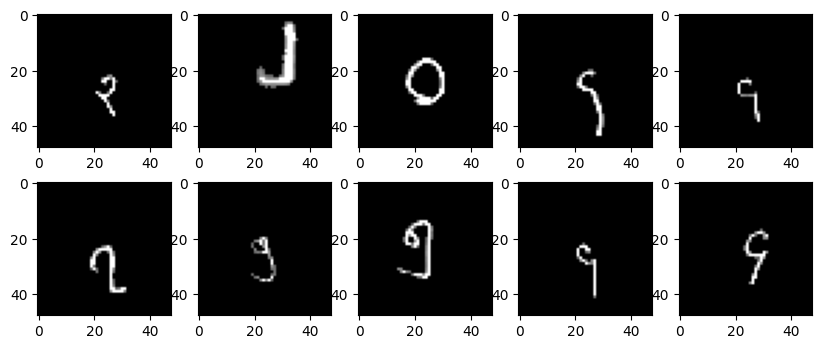

[3 8 0 5 4]
[3 3 4 4 4]


In [18]:
pred_y = model.predict(ts_X[selected_ids, :])
vis_X = ts_X[selected_ids, :].reshape((-1, 48, 48))
fig, axs = plt.subplots(2, 5, figsize=(10, 4))
for x, ax in zip(vis_X, axs.flatten()):
    ax.imshow(x, cmap="gray")
plt.show()
print (pred_y[:5])
print (pred_y[5:])

In [19]:
model2 = linear_model.SGDClassifier(
    loss='hinge', 
    penalty='l2', 
    alpha=0.0001, 
    l1_ratio=0.15, 
    max_iter=1000, n_jobs= 4, 
    random_state= 42)
model2.fit(tr_X, tr_y)
y_pred = model2.predict (ts_X)
print(metrics.classification_report(ts_y, y_pred))

              precision    recall  f1-score   support

           0       0.44      0.45      0.45        44
           1       0.43      0.43      0.43        47
           2       0.79      0.56      0.65       108
           3       0.54      0.56      0.55       149
           4       0.46      0.47      0.47       154
           5       0.45      0.36      0.40       188
           6       0.41      0.36      0.38       125
           7       0.37      0.47      0.41       123
           8       0.63      0.56      0.59       100
           9       0.18      0.29      0.22        87

    accuracy                           0.45      1125
   macro avg       0.47      0.45      0.46      1125
weighted avg       0.48      0.45      0.46      1125



In [21]:
from sklearn import feature_selection as fs, model_selection as ms
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
tr_X, ts_X, tr_y, ts_y = ms.train_test_split(X, y, random_state = 42)
model3 = KNeighborsClassifier()
model3.fit(tr_X, tr_y)
y_pred = model3.predict(ts_X)
print(metrics.classification_report(ts_y, y_pred))

              precision    recall  f1-score   support

           0       0.43      0.68      0.53        44
           1       0.37      0.85      0.52        47
           2       0.52      0.94      0.67       108
           3       0.91      0.83      0.87       149
           4       0.76      0.79      0.77       154
           5       0.81      0.58      0.67       188
           6       0.89      0.60      0.72       125
           7       0.78      0.57      0.66       123
           8       0.71      0.71      0.71       100
           9       0.82      0.46      0.59        87

    accuracy                           0.69      1125
   macro avg       0.70      0.70      0.67      1125
weighted avg       0.75      0.69      0.70      1125



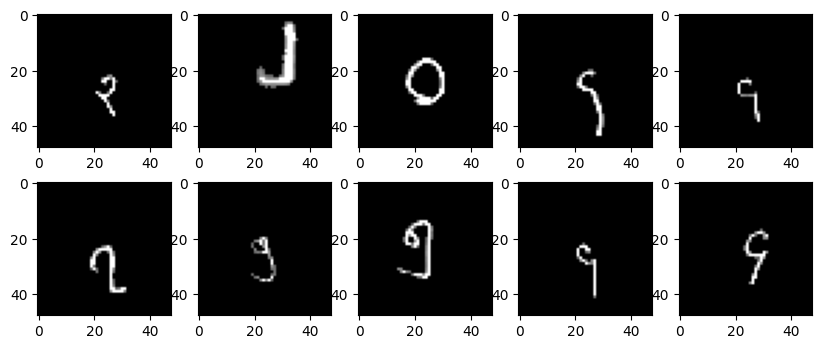

[3 6 0 4 4]
[7 5 5 4 4]


In [22]:
pred_y = model3.predict(ts_X[selected_ids, :])
vis_X = ts_X[selected_ids, :].reshape((-1, 48, 48))
fig, axs = plt.subplots(2, 5, figsize=(10, 4))
for x, ax in zip(vis_X, axs.flatten()):
    ax.imshow(x, cmap="gray")
plt.show()
print (pred_y[:5])
print (pred_y[5:])

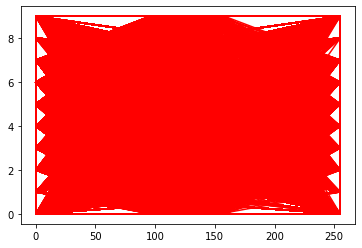

-0.43370285501950834


In [15]:
from sklearn import tree
%matplotlib inline
from matplotlib import pyplot as plt
tr_X, ts_X, tr_y, ts_y = ms.train_test_split(X, y, random_state=42)
tree_model = tree.DecisionTreeClassifier(random_state=0, max_depth=12, max_leaf_nodes=40)
tree_model.fit (tr_X, tr_y)
y_pred = tree_model.predict (ts_X)
plt.plot(ts_X, y_pred, color="red")
plt.show()
print (metrics.r2_score(ts_y, y_pred))

In [ ]:
# parameters
RANDOM_SEED = 42
LEARNING_RATE = 0.005
BATCH_SIZE = 4
N_EPOCHS = 150

IMG_SIZE = 48
N_CLASSES = 4

In [ ]:
X, y = load_data(as_frame=False, return_X_y=True, num_classes=N_CLASSES)
X.shape, y.shape

((1300, 2304), (1300,))

In [ ]:
X = 1.0 - X/255.0
X = X.reshape((-1, 48, 48))
y = y.astype(np.int8)

In [ ]:
from sklearn import model_selection as ms
tr_X, ts_X, tr_y, ts_y = ms.train_test_split(X, y, random_state=42)

In [ ]:
tr_tensor_x = torch.Tensor(tr_X) # transform to torch tensor
tr_tensor_y = torch.Tensor(tr_y).long()

ts_tensor_x = torch.Tensor(ts_X) # transform to torch tensor
ts_tensor_y = torch.Tensor(ts_y).long()

#transforms = transforms.Compose([transforms.ToTensor()])
#my_dataset = datasets.ImageFolder(root="labelled_data", transform=transforms)
my_dataset = TensorDataset(tr_tensor_x, tr_tensor_y) # create your datset
my_dataloader = DataLoader(my_dataset, batch_size=BATCH_SIZE) # create your dataloader

ts_dataset = TensorDataset(ts_tensor_x, ts_tensor_y) # create your datset
ts_dataloader = DataLoader(ts_dataset, batch_size=BATCH_SIZE) # create your dataloader

In [ ]:
def get_accuracy(model, data_loader, device):
    '''
    Function for computing the accuracy of the predictions over the entire data_loader
    '''
    
    correct_pred = 0 
    n = 0
    
    with torch.no_grad():
        model.eval()
        for X, y_true in data_loader:

            X = X.to(device)
            y_true = y_true.to(device)

            _, y_prob = model(X)
            _, predicted_labels = torch.max(y_prob, 1)

            n += y_true.size(0)
            correct_pred += (predicted_labels == y_true).sum()

    return correct_pred.float() / n

In [ ]:
#Defining the convolutional neural network
class LeNet5(nn.Module):

    def __init__(self, n_classes):
        super(LeNet5, self).__init__()
        
        self.feature_extractor = nn.Sequential(            
            nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1), # C1
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2), # S2
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1), #C3
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2), # S4
            nn.Conv2d(in_channels=16, out_channels=120, kernel_size=9, stride=1), #C5
            nn.Tanh(),
        )

        self.classifier = nn.Sequential(
            nn.Linear(in_features=120, out_features=84), #F6
            nn.Tanh(),
            nn.Linear(in_features=84, out_features=n_classes), #F7
        )

    """
    Layer 1 (C1): The first convolutional layer with 6 kernels of size 5×5 and the stride of 1. 
    Given the input size (48×48×1), the output of this layer is of size 44×44×6.
    Layer 2 (S2): A subsampling/pooling layer with 6 kernels of size 2×2 and the stride of 2. 
    The subsampling layer in the original architecture was a bit more complex than the traditionally 
    used max/average pooling layers. I will quote [1]: “ The four inputs to a unit in S2 are added, 
    then multiplied by a trainable coefficient, and added to a trainable bias. The result is passed 
    through a sigmoidal function.”. As a result of non-overlapping receptive fields, the input to 
    this layer is 1/4th in size (22×22×6).
    Layer 3 (C3): The second convolutional layer with the same configuration as the first one, 
    however, this time with 16 filters. The output of this layer is 18x18x16.
    Layer 4 (S4): The second pooling layer. The logic is identical to the previous one, but this 
    time the layer has 16 filters. The output of this layer is of size 9×9×16.
    Layer 5 (C5): The last convolutional layer with 20 5×5 kernels. Given that the input to 
    this layer is of size 9×9×16 and the kernels are of size 9×9, the output is 1×1×120. 
    Layer 6 (F6): The first fully-connected layer, which takes the input of 120 units and returns 84 units. In the original paper, the authors used a custom activation function — a variant of the tanh activation function. For a thorough explanation, please refer to Appendix A in [1].
    Layer 7 (F7): The last dense layer, which outputs 10 units. In [1], the authors used Euclidean 
    Radial Basis Function neurons as activation functions for this layer.
    """

    def forward(self, x):
        # print (x.size())
        x = x.unsqueeze(1)
        # print (x.size())
        x = self.feature_extractor(x)
        x = torch.flatten(x, 1)
        logits = self.classifier(x)
        probs = F.softmax(logits, dim=1)
        return logits, probs

torch.manual_seed(RANDOM_SEED)

model = LeNet5(N_CLASSES).to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
criterion = nn.CrossEntropyLoss()

In [ ]:
from torch.nn import functional as F

def train(train_loader, model, criterion, optimizer, device):
    '''
    Function for the training step of the training loop
    '''

    model.train()
    running_loss = 0
    
    for X, y_true in train_loader:

        optimizer.zero_grad()
        
        X = X.to(device)
        y_true = y_true.to(device)
    
        # Forward pass
        y_hat, _ = model(X) 
        loss = criterion(y_hat, y_true) 

        running_loss += loss.item() * X.size(0)

        # Backward pass
        loss.backward()
        optimizer.step()
        
    epoch_loss = running_loss / len(train_loader.dataset)
    return model, optimizer, epoch_loss

def validate(valid_loader, model, criterion, device):
    '''
    Function for the validation step of the training loop
    '''
   
    model.eval()
    running_loss = 0
    
    for X, y_true in valid_loader:
    
        X = X.to(device)
        y_true = y_true.to(device)

        # Forward pass and record loss
        y_hat, _ = model(X) 
        loss = criterion(y_hat, y_true) 
        running_loss += loss.item() * X.size(0)

    epoch_loss = running_loss / len(valid_loader.dataset)
        
    return model, epoch_loss

def training_loop(model, criterion, optimizer, train_loader, valid_loader, epochs, device, print_every=1):
    '''
    Function defining the entire training loop
    '''
    
    # set objects for storing metrics
    best_loss = 1e10
    train_losses = []
    valid_losses = []
 
    # Train model
    for epoch in range(0, epochs):

        # training
        model, optimizer, train_loss = train(train_loader, model, criterion, optimizer, device)
        train_losses.append(train_loss)

        # validation
        with torch.no_grad():
            model, valid_loss = validate(valid_loader, model, criterion, device)
            valid_losses.append(valid_loss)

        if epoch % print_every == (print_every - 1):
            
            train_acc = get_accuracy(model, train_loader, device=device)
            valid_acc = get_accuracy(model, valid_loader, device=device)
                
            print(f'{datetime.now().time().replace(microsecond=0)} --- '
                  f'Epoch: {epoch}\t'
                  f'Train loss: {train_loss:.4f}\t'
                  f'Valid loss: {valid_loss:.4f}\t'
                  f'Train accuracy: {100 * train_acc:.2f}\t'
                  f'Valid accuracy: {100 * valid_acc:.2f}')

    #plot_losses(train_losses, valid_losses)
    
    return model, optimizer, (train_losses, valid_losses)

model, optimizer, _ = training_loop(model, criterion, optimizer, my_dataloader, ts_dataloader, N_EPOCHS, DEVICE)

10:25:24 --- Epoch: 0	Train loss: 0.8765	Valid loss: 0.6933	Train accuracy: 77.64	Valid accuracy: 75.69
10:25:25 --- Epoch: 1	Train loss: 0.5477	Valid loss: 0.7146	Train accuracy: 81.33	Valid accuracy: 80.00
10:25:26 --- Epoch: 2	Train loss: 0.3882	Valid loss: 0.4766	Train accuracy: 91.38	Valid accuracy: 86.15
10:25:27 --- Epoch: 3	Train loss: 0.2897	Valid loss: 0.4655	Train accuracy: 92.72	Valid accuracy: 87.38
10:25:28 --- Epoch: 4	Train loss: 0.1991	Valid loss: 0.4251	Train accuracy: 95.08	Valid accuracy: 88.00
10:25:29 --- Epoch: 5	Train loss: 0.2010	Valid loss: 0.4981	Train accuracy: 93.74	Valid accuracy: 85.85
10:25:30 --- Epoch: 6	Train loss: 0.1758	Valid loss: 0.5550	Train accuracy: 93.33	Valid accuracy: 85.85
10:25:31 --- Epoch: 7	Train loss: 0.1572	Valid loss: 0.4200	Train accuracy: 95.38	Valid accuracy: 88.92
10:25:32 --- Epoch: 8	Train loss: 0.1320	Valid loss: 0.3582	Train accuracy: 97.44	Valid accuracy: 91.69
10:25:33 --- Epoch: 9	Train loss: 0.1125	Valid loss: 0.3899	Trai

KeyboardInterrupt: ignored

3

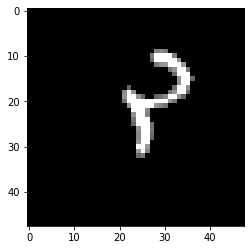

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(1 - X[1001]/255.0, cmap="gray")
y[1001]